In [32]:
import os

import numpy as np
import pandas as pd

from skimage.external import tifffile

#### Radboud: Prostate glands are individually labelled. Valid values are:

0: background (non tissue) or unknown

1: stroma (connective tissue, non-epithelium tissue)

2: healthy (benign) epithelium

3: cancerous epithelium (Gleason 3)

4: cancerous epithelium (Gleason 4)

5: cancerous epithelium (Gleason 5)


#### Karolinska: Regions are labelled. Valid values are:

1: background (non tissue) or unknown

2: benign tissue (stroma and epithelium combined)

3: cancerous tissue (stroma and epithelium combined)


In [24]:
colors = {
    'radboud': {0: '#ffffff',
                1: '#0000ff',
                2: '#008000',
                3: '#400000',                
                4: '#800000',                
                5: '#ff0000'},
    'karolinska': {0: '#ffffff',
                   1: '#808080',
                   2: '#ff0000'},
}

In [17]:
wsi_csv_path = "/mnt/HDDData/pdata/train.csv"

In [19]:
wsi_df = pd.read_csv(wsi_csv_path)

In [2]:
fname = "/mnt/HDDData/pdata/train_label_masks/0018ae58b01bdadc8e347995b69f99aa_mask.tiff"

In [15]:
image_id = fname.split('/')[-1].split('_')[0]

In [20]:
img_row = wsi_df[wsi_df['image_id'] == image_id].iloc[0] 

In [30]:
o_img = tifffile.imread(fname)[..., 0]

In [73]:
n_img = np.zeros(o_img.shape + (3,), dtype=np.uint8)

In [74]:
def hex2rgb(h):
    h = h.lstrip('#')
    return [int(h[i:i+2], 16) for i in (0, 2, 4)]

for i in range(6):
    k = o_img == i
    if k.sum() > 0:
        n_img[k] = hex2rgb(colors[img_row.data_provider][i])

In [75]:
np.prod(n_img.shape)

447676416

In [81]:
import cv2

In [82]:
t_img = cv2.resize(n_img, None, fx=0.1, fy=0.1)

In [83]:
import matplotlib.pyplot as plt

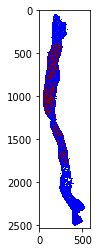

In [85]:
plt.imshow(t_img);

In [96]:
# tifffile.imsave('/mnt/HDDData/pdata/tmp.tiff', t_img, compress='lzma', tile=(512, 512))
# tifffile.imsave('/mnt/HDDData/pdata/tmp.tiff', t_img, compress=9)

In [110]:
cv2.imwrite('/mnt/HDDData/pdata/tmp.tiff', cv2.cvtColor(n_img, cv2.COLOR_RGB2BGR))

True

In [109]:
!tiffinfo '/mnt/HDDData/pdata/tmp.tiff'

TIFF Directory at offset 0x22d80 (142720)
  Image Width: 589 Image Length: 2534
  Bits/Sample: 8
  Sample Format: unsigned integer
  Compression Scheme: LZW
  Photometric Interpretation: RGB color
  Samples/Pixel: 3
  Rows/Strip: 4
  Planar Configuration: single image plane
  Predictor: horizontal differencing 2 (0x2)


In [104]:
t2_img = cv2.imread('/mnt/HDDData/pdata/tmp.tiff')
t2_img = cv2.cvtColor(t2_img, cv2.COLOR_BGR2RGB)

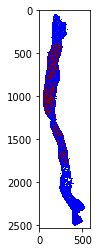

In [106]:
plt.imshow(t2_img);

In [51]:
!tiffinfo {fname}

TIFF Directory at offset 0x1d293c (1911100)
  Image Width: 5888 Image Length: 25344
  Tile Width: 512 Tile Length: 512
  Resolution: 20833.4, 20833.4 pixels/cm
  Bits/Sample: 8
  Sample Format: unsigned integer
  Compression Scheme: LZW
  Photometric Interpretation: RGB color
  Orientation: row 0 top, col 0 lhs
  Samples/Pixel: 3
  SMin Sample Value: 0
  SMax Sample Value: 4
  Planar Configuration: single image plane
TIFF Directory at offset 0x20a4c8 (2139336)
  Subfile Type: reduced-resolution image (1 = 0x1)
  Image Width: 1472 Image Length: 6336
  Tile Width: 512 Tile Length: 512
  Resolution: 5208.34, 5208.34 pixels/cm
  Bits/Sample: 8
  Sample Format: unsigned integer
  Compression Scheme: LZW
  Photometric Interpretation: RGB color
  Orientation: row 0 top, col 0 lhs
  Samples/Pixel: 3
  Planar Configuration: single image plane
TIFF Directory at offset 0x211738 (2168632)
  Subfile Type: reduced-resolution image (1 = 0x1)
  Image Width: 368 Image Length: 1584
  Tile Width: 512 Til